**Problem Statement.**
    ATC wants to track the weather and predict the visibility distance. To fly the planes the visibility distance is very much important, that is why this project is very much crucial.    

What is visibility distance prediction? Visibility distance, that means how far any object can be seen from. Based on various climate forecasting parameters, we can predict the visibility distance with machine learning techniques.

Data Collection: The data is collected from vaious sources and dumped into mongoDb for our purpose. We have merged the ddataset and will work on the data analysis on top of that.

Feature info:

Date ,
Visibility - distance from which objects can be seen ,
DRYBULBTEMPF - vry bulb temperature in farenheit (common used) ,
WETBULBTEMPF - Wet bulb temperature in farenheit ,
DewPointTEMPF - dew point temprature in farenheit ,
RelativeHumidity - Relative humidity (percent) ,
windspeed ,
windDirection - ffrom true north using compass ,
stationPressure - Atmpospheric, pressure ( inches of Mercury) ,
SeaLevelPressure - Sea level pressure (in Hg) ,
Precipitation - Total Precipitation past hour ( in inches)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("jfk_weather_cleaned.csv")


Top 5 records

In [3]:
df.head(5)


,DATE,HOURLYVISIBILITY,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYStationPressure,HOURLYSeaLevelPressure,HOURLYPrecip,HOURLYAltimeterSetting,HOURLYWindDirectionSin,HOURLYWindDirectionCos,HOURLYPressureTendencyIncr,HOURLYPressureTendencyDecr,HOURLYPressureTendencyCons
0,2010-01-01 01:00:00,6.0,33.0,32.0,31.0,92.0,0.0,29.97,29.99,0.01,29.99,0.0,1.0,0,1,0
1,2010-01-01 02:00:00,6.0,33.0,33.0,32.0,96.0,0.0,29.97,29.99,0.02,29.99,0.0,1.0,0,1,0
2,2010-01-01 03:00:00,5.0,33.0,33.0,32.0,96.0,0.0,29.97,29.99,0.00,29.99,0.0,1.0,0,1,0
3,2010-01-01 04:00:00,5.0,33.0,33.0,32.0,96.0,0.0,29.95,29.97,0.00,29.97,0.0,1.0,0,1,0
4,2010-01-01 05:00:00,5.0,33.0,32.0,31.0,92.0,0.0,29.93,29.96,0.00,29.95,0.0,1.0,0,1,0


Shape of Data Set

In [4]:
df.shape

(75119, 16)

Summary of the dataset

In [5]:
df.describe()

,HOURLYVISIBILITY,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYStationPressure,HOURLYSeaLevelPressure,HOURLYPrecip,HOURLYAltimeterSetting,HOURLYWindDirectionSin,HOURLYWindDirectionCos,HOURLYPressureTendencyIncr,HOURLYPressureTendencyDecr,HOURLYPressureTendencyCons
count,75119.000000,75119.000000,75119.000000,75119.000000,75119.000000,75119.000000,75119.000000,75119.000000,75119.000000,75119.000000,75119.000000,7.511900e+04,75119.000000,75119.000000,75119.000000
mean,9.205796,55.355509,49.333830,42.422223,64.809942,11.252965,30.005124,30.026116,0.004574,30.025137,-0.166465,2.867949e-02,0.503468,0.490835,0.005698
std,2.209374,17.393210,16.178678,19.577775,19.899904,6.099392,0.234245,0.233949,0.033581,0.234212,0.629050,7.587989e-01,0.499991,0.499919,0.075268
min,0.000000,1.000000,-1.000000,-19.000000,8.000000,0.000000,28.490000,28.540000,0.000000,28.510000,-1.000000,-1.000000e+00,0.000000,0.000000,0.000000
25%,10.000000,42.000000,36.000000,27.000000,49.000000,7.000000,29.860000,29.880000,0.000000,29.880000,-0.766044,-7.660440e-01,0.000000,0.000000,0.000000
50%,10.000000,56.000000,50.000000,44.000000,66.000000,10.000000,30.000000,30.020000,0.000000,30.020000,-0.173648,6.123230e-17,1.000000,0.000000,0.000000
75%,10.000000,70.000000,63.000000,59.000000,82.000000,15.000000,30.150000,30.170000,0.000000,30.170000,0.342020,7.660440e-01,1.000000,1.000000,0.000000
max,10.000000,102.000000,85.000000,84.000000,100.000000,53.000000,30.830000,30.850000,2.410000,30.850000,1.000000,1.000000e+00,1.000000,1.000000,1.000000


In [6]:
df.isna().sum()

DATE                          0
HOURLYVISIBILITY              0
HOURLYDRYBULBTEMPF            0
HOURLYWETBULBTEMPF            0
HOURLYDewPointTempF           0
HOURLYRelativeHumidity        0
HOURLYWindSpeed               0
HOURLYStationPressure         0
HOURLYSeaLevelPressure        0
HOURLYPrecip                  0
HOURLYAltimeterSetting        0
HOURLYWindDirectionSin        0
HOURLYWindDirectionCos        0
HOURLYPressureTendencyIncr    0
HOURLYPressureTendencyDecr    0
HOURLYPressureTendencyCons    0
dtype: int64

Report - no missing values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75119 entries, 0 to 75118
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DATE                        75119 non-null  object 
 1   HOURLYVISIBILITY            75119 non-null  float64
 2   HOURLYDRYBULBTEMPF          75119 non-null  float64
 3   HOURLYWETBULBTEMPF          75119 non-null  float64
 4   HOURLYDewPointTempF         75119 non-null  float64
 5   HOURLYRelativeHumidity      75119 non-null  float64
 6   HOURLYWindSpeed             75119 non-null  float64
 7   HOURLYStationPressure       75119 non-null  float64
 8   HOURLYSeaLevelPressure      75119 non-null  float64
 9   HOURLYPrecip                75119 non-null  float64
 10  HOURLYAltimeterSetting      75119 non-null  float64
 11  HOURLYWindDirectionSin      75119 non-null  float64
 12  HOURLYWindDirectionCos      75119 non-null  float64
 13  HOURLYPressureTendencyIncr  751

Analyse the distribution of data in every column

In [8]:
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d %H:%M:%S')

In [9]:
np.dtype(df['DATE'])

dtype('<M8[ns]')

In [10]:
df.head()

,DATE,HOURLYVISIBILITY,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYStationPressure,HOURLYSeaLevelPressure,HOURLYPrecip,HOURLYAltimeterSetting,HOURLYWindDirectionSin,HOURLYWindDirectionCos,HOURLYPressureTendencyIncr,HOURLYPressureTendencyDecr,HOURLYPressureTendencyCons
0,2010-01-01 01:00:00,6.0,33.0,32.0,31.0,92.0,0.0,29.97,29.99,0.01,29.99,0.0,1.0,0,1,0
1,2010-01-01 02:00:00,6.0,33.0,33.0,32.0,96.0,0.0,29.97,29.99,0.02,29.99,0.0,1.0,0,1,0
2,2010-01-01 03:00:00,5.0,33.0,33.0,32.0,96.0,0.0,29.97,29.99,0.00,29.99,0.0,1.0,0,1,0
3,2010-01-01 04:00:00,5.0,33.0,33.0,32.0,96.0,0.0,29.95,29.97,0.00,29.97,0.0,1.0,0,1,0
4,2010-01-01 05:00:00,5.0,33.0,32.0,31.0,92.0,0.0,29.93,29.96,0.00,29.95,0.0,1.0,0,1,0


In [11]:
columns = [column for column in df.columns if column != "HOURLYVISIBILITY"]

numeric_features = [feature for feature in columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in columns if df[feature].dtype == 'O']

print("Numerical columns =",len(numeric_features))
print("categorical columns =",len(categorical_features))

Numerical columns = 15
categorical columns = 0


Univariate Analysis - the term univariate analysis refers to the analysis of one variable prefix "uni" means "one". The purpose of univariate analysis is to understand the distribution of values for a single variable.

bivariate analysis - the analysis of two variable,
multivariate analysis - thhe analysis of two or more variable

In [12]:
for feature in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(x=df[feature], color='blue')
    plt.xlabel(feature)
    plt.title(f"Univariate Analysis of {feature}", fontsize=14, fontweight='bold', alpha=0.8)
    plt.tight_layout()
    plt.savefig(f"{feature}_univariate.png")  
    plt.close() 


In [13]:
df.columns

Index(['DATE', 'HOURLYVISIBILITY', 'HOURLYDRYBULBTEMPF', 'HOURLYWETBULBTEMPF',
       'HOURLYDewPointTempF', 'HOURLYRelativeHumidity', 'HOURLYWindSpeed',
       'HOURLYStationPressure', 'HOURLYSeaLevelPressure', 'HOURLYPrecip',
       'HOURLYAltimeterSetting', 'HOURLYWindDirectionSin',
       'HOURLYWindDirectionCos', 'HOURLYPressureTendencyIncr',
       'HOURLYPressureTendencyDecr', 'HOURLYPressureTendencyCons'],
      dtype='object')

Multivariate analysis - multivariate analysis is the analysis of more than one variable.

In [14]:
for column in df.drop(["DATE"], axis=1):
    plt.figure(figsize=(8, 5), facecolor='white')
    sns.histplot(df[column], kde=True)  # sns.distplot is deprecated
    plt.xlabel(column, fontsize=14)
    plt.title(f"Multivariate Analysis: {column}", fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig(f"{column}_multivariate.png")
    plt.close()

We can see some columns are not following normal distribution.
we will use such algorithms which do not require normal distribution such as decision tree and XGBoost. Also, precipitation and pressure tendency cons have most of data value near 0. it wont be very useful for our analysis.

In [15]:
df = df.drop(columns=["HOURLYPrecip","HOURLYPressureTendencyCons"])

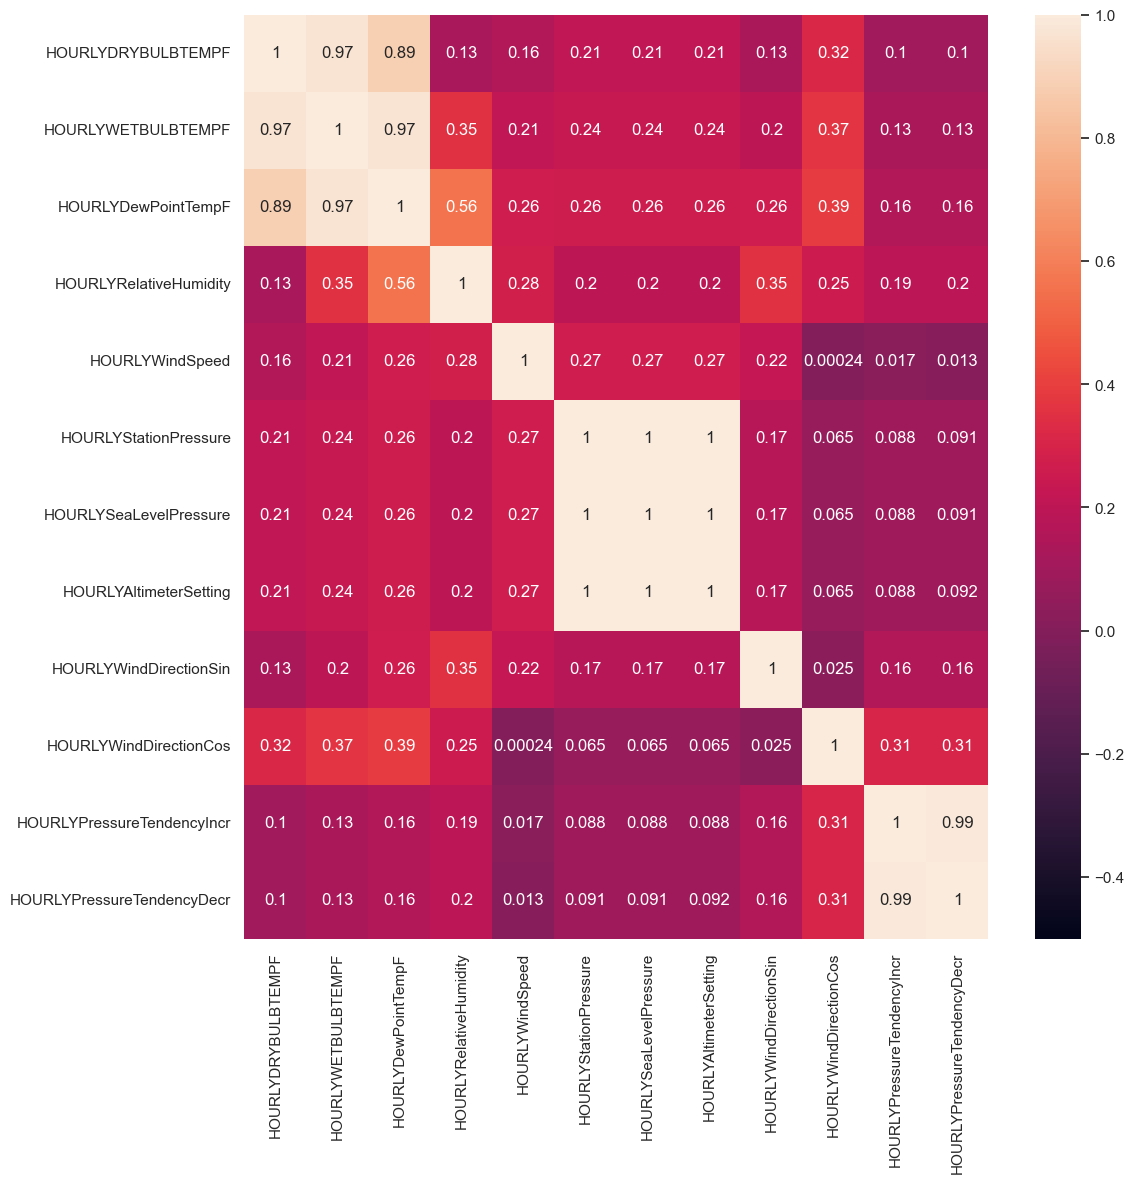

In [16]:
df = df.set_index("DATE")
plt.figure(figsize=(12,12))
plt_data = df.drop(columns="HOURLYVISIBILITY")
sns.heatmap(plt_data.corr().abs(), vmin= -0.5, vmax = 1, annot=True)
plt.savefig("initial_heatmap.png")


There is clear correlation between some columns. Let's drop the columns with high correlation.

In [17]:
df = df.drop(["HOURLYWETBULBTEMPF","HOURLYDewPointTempF","HOURLYSeaLevelPressure","HOURLYAltimeterSetting","HOURLYPressureTendencyDecr"],axis=1)

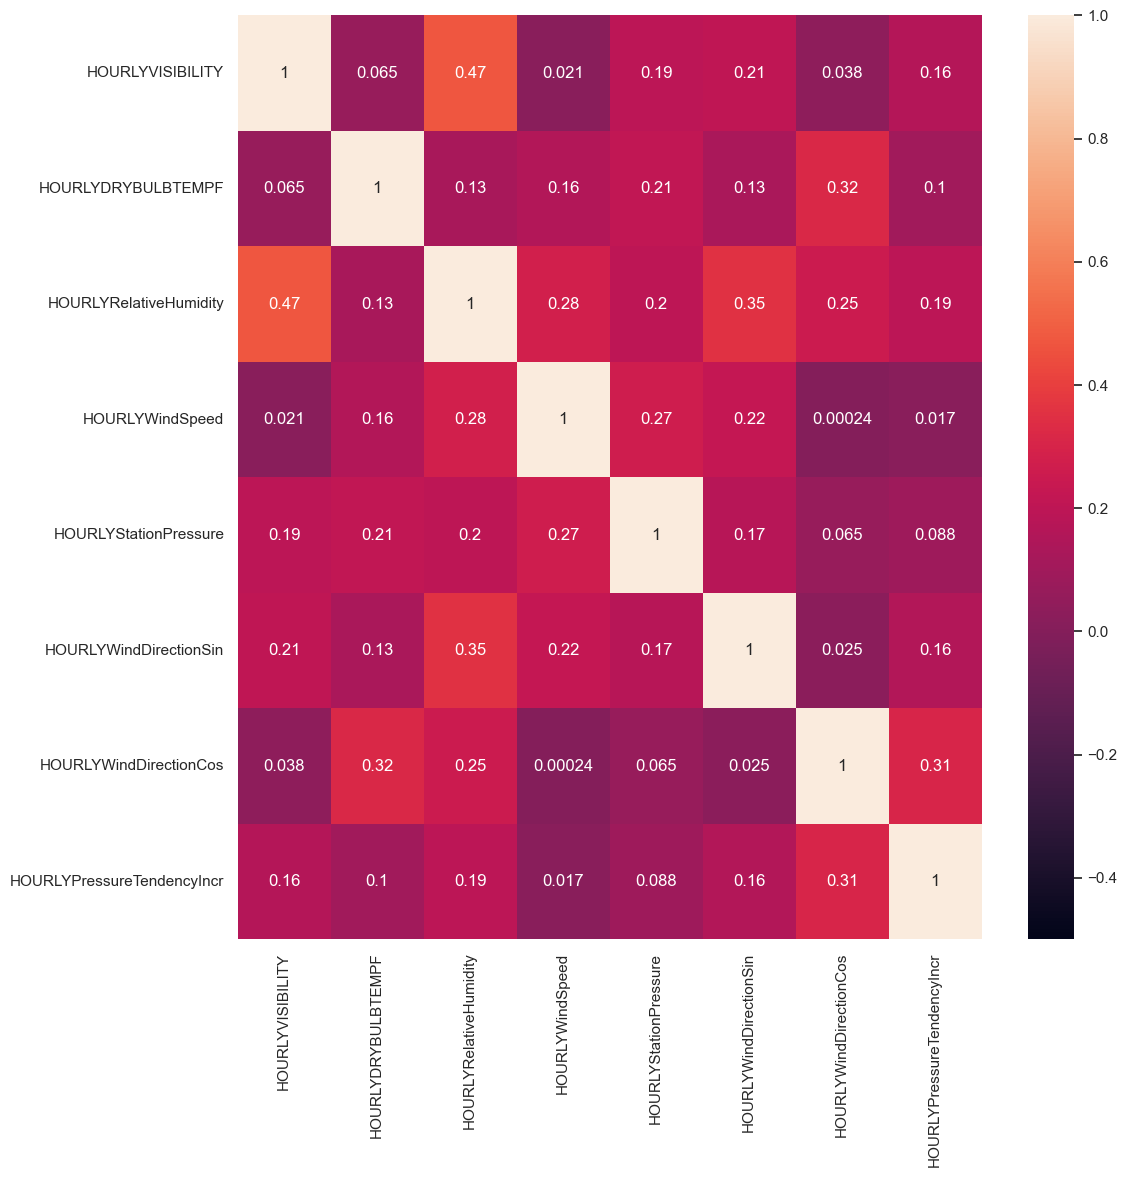

In [18]:
plt.figure(figsize=(12,12))
plt_data = df
sns.heatmap(plt_data.corr().abs(), vmin= -0.5, vmax = 1, annot=True)
plt.savefig("final_heatmap.png")

MultiCollinearity Check - Variance Inflation Factor (VIF) - Multicollinearity occurs when there are two or more independent variable in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated. Multicollinearity can be deteced using  various technique being the Variance Inflation Factor.

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def compute_vif(considered_features,df):
    x = df[considered_features]
    x['intercept'] = 1 #calculation of variance requires a constant

    vif = pd.DataFrame()
    vif['Variable'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

features = df.columns.to_list()
# features.pop(features.index("DATE"))
compute_vif(features,df)

,Variable,VIF
0,HOURLYVISIBILITY,1.371251
1,HOURLYDRYBULBTEMPF,1.310899
2,HOURLYRelativeHumidity,1.795632
3,HOURLYWindSpeed,1.321399
4,HOURLYStationPressure,1.415844
5,HOURLYWindDirectionSin,1.345822
6,HOURLYWindDirectionCos,1.360299
7,HOURLYPressureTendencyIncr,1.168096
8,intercept,24114.911654


Now we can se that data has no collinearity.

In [20]:
df.isna().sum()

HOURLYVISIBILITY              0
HOURLYDRYBULBTEMPF            0
HOURLYRelativeHumidity        0
HOURLYWindSpeed               0
HOURLYStationPressure         0
HOURLYWindDirectionSin        0
HOURLYWindDirectionCos        0
HOURLYPressureTendencyIncr    0
dtype: int64

MODEL BUILDING (CLUSTERING)

Elbow method to find best clusters for k-means

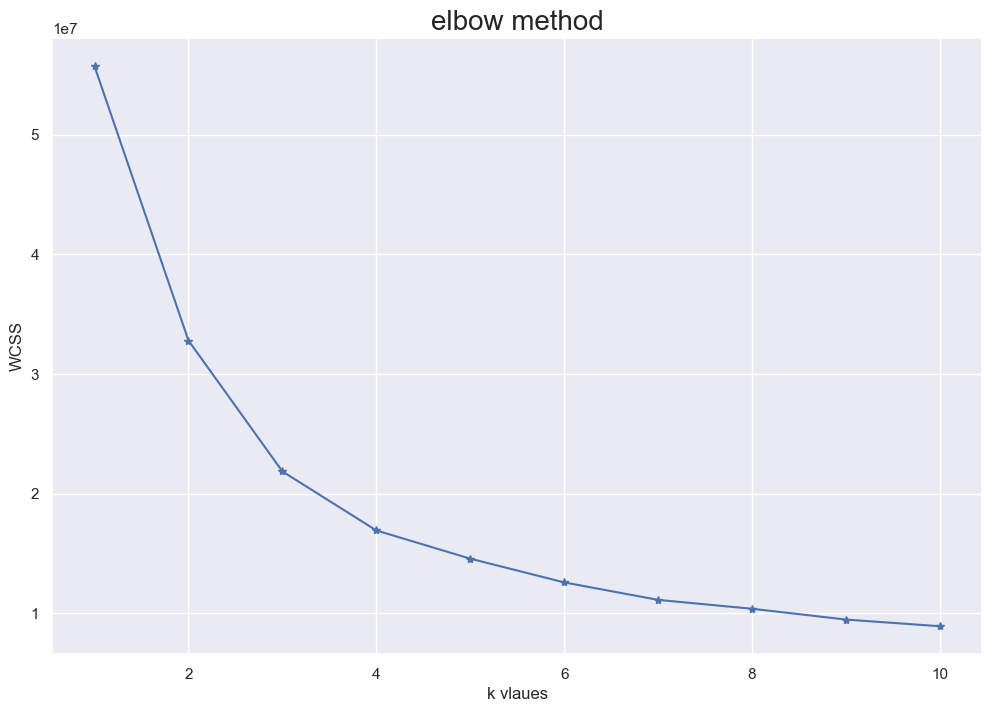

<Figure size 640x480 with 0 Axes>

In [21]:
from sklearn.cluster import KMeans

wcss= {}
sns.set()
plt.figure(figsize=(12,8))
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(df)
    wcss[i] = km.inertia_

plt.plot(range(1,11),wcss.values(),marker="*")
plt.title("elbow method",fontsize=20)
plt.xlabel("k vlaues")
plt.ylabel("WCSS")
plt.show()
plt.savefig("elbowmethod.png")

Apply Kmeans clustering with 3 clusters

In [22]:
from kneed import KneeLocator

def select_no_of_clusters(dataframe):

  wcss=[]
  try:
    for i in range (1,11):
      kmeans = KMeans(n_clusters=i,init="k-means++",random_state=42)
      kmeans.fit(dataframe)
      wcss.append(kmeans.inertia_)
    kn = KneeLocator(range(1,11), wcss,curve='convex', direction='decreasing')
    print('The optimum number of clusters is: '+str(kn.knee)+' . Exited the elbow_plot method of the KMeansclus')
    return kn. knee
  except Exception as e:
    print(e)
no_of_clusters = select_no_of_clusters(df)
print("no of clusters is", no_of_clusters)
kmeans = KMeans(n_clusters=no_of_clusters)
kmeans.fit(df)
labels = kmeans.predict(df)
df['CLUSTER'] = labels

The optimum number of clusters is: 3 . Exited the elbow_plot method of the KMeansclus
no of clusters is 3


APPLY STANDARDSCALER

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2)

x_train = train_set.drop(columns=['HOURLYVISIBILITY', 'CLUSTER'])
y_train = train_set[['HOURLYVISIBILITY']]
x_test = test_set.drop(columns=['HOURLYVISIBILITY', 'CLUSTER'])
y_test = test_set[['HOURLYVISIBILITY']]
preprocessor = StandardScaler()
x_train = preprocessor.fit_transform(x_train)
x_test = preprocessor.transform(x_test)

In [ ]:

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

models = {}
models['linear_regression'] = LinearRegression()
models['ridge_regression'] = Ridge()
models['lasso_regression'] = Lasso()
models['elasticnet'] = ElasticNet()
models['decision_tree_regressor'] = DecisionTreeRegressor()
models['random_forest_regressor'] = RandomForestRegressor()

def select_best_model(models = models, x_train = x_train, y_train = y_train, x_test = x_test, y_test = y_test):
  models_details = []
  for model_name, model in models.items():
    model_detail = {}
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    model_score = r2_score(y_test, y_pred)
    model_detail['model_name'] = model_name
    model_detail['model_score' ] = model_score
    print("%s model is trained" % model_name)
    models_details.append(model_detail)
  return models_details

models_details = select_best_model()
models_details

linear_regression model is trained
ridge_regression model is trained
lasso_regression model is trained
elasticnet model is trained
decision_tree_regressor model is trained
random_forest_regressor model is trained


[{'model_name': 'linear_regression', 'model_score': 0.273732191234492},
 {'model_name': 'ridge_regression', 'model_score': 0.2737320187732264},
 {'model_name': 'lasso_regression', 'model_score': 0.011742736910236085},
 {'model_name': 'elasticnet', 'model_score': 0.12427880726155871},
 {'model_name': 'decision_tree_regressor', 'model_score': 0.2852788096674733},
 {'model_name': 'random_forest_regressor', 'model_score': 0.6174477656076192}]

In [29]:
rf_grid = {     
"n_estimators":[10,20,50,100,130],
"max_depth":[10,20,30,40,50],
"max_features":['auto','sqrt'],
"min_samples_split":[2,6,10],
"bootstrap":[True,False]
}

In [30]:
rf_grid

{'n_estimators': [10, 20, 50, 100, 130],
 'max_depth': [10, 20, 30, 40, 50],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 6, 10],
 'bootstrap': [True, False]}

Let's
start CV operation on top of randomforest

In [ ]:
from sklearn.model_selection import GridSearchCV
import joblib

model_grid = GridSearchCV(
  RandomForestRegressor(), rf_grid,
  cv = 2,
  n_jobs =- 1,
  verbose=3 )
model_grid.fit(x_train,y_train)

Fitting 2 folds for each of 300 candidates, totalling 600 fits


,estimator,RandomForestRegressor()
,param_grid,"{'bootstrap': [True, False], 'max_depth': [10, 20, ...], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 6, ...], ...}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,2
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,130


Best params for randomforest

In [ ]:
best_params = model_grid.best_params_
rf_model = RandomForestRegressor( **best_params)

Lets train our model

In [ ]:
def train_model():
  preprocessor = StandardScaler()
  list_of_clusters:list = train_set['CLUSTER'].unique()
  models = {}
  for cluster_no in list_of_clusters:
    train_set_cluster = train_set[train_set['CLUSTER'] == cluster_no]
    test_set_cluster = test_set[test_set['CLUSTER'] == cluster_no]

    x_train = train_set_cluster.drop(columns = ['HOURLYVISIBILITY', 'CLUSTER'])
    x_test = test_set_cluster.drop(columns = ['HOURLYVISIBILITY', 'CLUSTER'])

    x_train = preprocessor.fit_transform(x_train)
    x_test = preprocessor.transform(x_test)

    y_train = train_set_cluster[['HOURLYVISIBILITY']]
    y_test = test_set_cluster[['HOURLYVISIBILITY']]

    # print(x_train, y_train, x_test, y_test)
    print(f"Training on cluster no {cluster_no}")
    model = rf_model
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)

    score = r2_score(y_test,y_pred)
    print(f"score for cluster no {cluster_no} is {score}")

    models[f"model_{cluster_no}"] = model
  return models

models = train_model()

Training on cluster no 0
score for cluster no 0 is 0.5604617318698439
Training on cluster no 2
score for cluster no 2 is 0.006293107105441842
Training on cluster no 1
score for cluster no 1 is 0.43485731071119293


In [32]:
models

{'linear_regression': LinearRegression(),
 'ridge_regression': Ridge(),
 'lasso_regression': Lasso(),
 'elasticnet': ElasticNet(),
 'decision_tree_regressor': DecisionTreeRegressor(),
 'random_forest_regressor': RandomForestRegressor()}